<a href="https://colab.research.google.com/github/Vincenzo-Verma/infosys_python_internship/blob/main/Milestone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
data_frame = pd.read_csv('/content/sample_data/healthcare-dataset-stroke-data.csv')

# Lasso Regression

In [15]:
from sklearn.linear_model import Lasso

def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    # is alpha is the penalizing factor

    # use of iterations show that it follows gradient descent.
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])

# """    #Check if a plot is to be made for the entered alpha
#     if alpha in models_to_plot:
#         plt.subplot(models_to_plot[alpha])
#         plt.tight_layout()
#         plt.plot(data['x'],y_pred)
#         plt.plot(data['x'],data['y'],'.')
#         plt.title('Plot for alpha: %.3g'%alpha)
# """

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss] # loss function Residual Sum of squares
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

# Rigid Regression

# Accuracy score

In [8]:
data_frame['Rural/Urban'] = data_frame['Residence_type'].map({'Rural': 0, 'Urban': 1})
data_frame['Never_Worked'] = 0
data_frame['Private'] = 0
data_frame['Self-Employed'] = 0
data_frame['gender'] = data_frame['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})

# Iterate through the 'work_type' column and update the corresponding new columns
for index, row in data_frame.iterrows():
    if row['work_type'] == 'Never_worked':
        data_frame.loc[index, 'Never_Worked'] = 1
    elif row['work_type'] == 'Private':
        data_frame.loc[index, 'Private'] = 1
    elif row['work_type'] == 'Self-employed':
        data_frame.loc[index, 'Self-Employed'] = 1
data_frame['work_type'] = data_frame['work_type'].replace({'Never_worked': 0, 'Private': 1, 'Self-employed': 2, 'Govt_job': 3})

data_frame['smoking_status'] = data_frame['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2})

data_frame.head()

<ipython-input-8-c9a2e61eea41>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_frame['gender'] = data_frame['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Rural/Urban,Never_Worked,Private,Self-Employed
0,9046,0,67.0,0,1,Yes,1,Urban,228.69,36.6,1,1,1,0,1,0
1,51676,1,61.0,0,0,Yes,2,Rural,202.21,NaN,0,1,0,0,0,1
2,31112,0,80.0,0,1,Yes,1,Rural,105.92,32.5,0,1,0,0,1,0
3,60182,1,49.0,0,0,Yes,1,Urban,171.23,34.4,2,1,1,0,1,0
4,1665,1,79.0,1,0,Yes,2,Rural,174.12,24.0,0,1,0,0,0,1


In [9]:
# prompt: drop the rows which contain None values or empty values or labelled "Unknown"

# Drop rows with 'Unknown' values in specific columns
data_frame = data_frame[data_frame['smoking_status'] != 'Unknown']

# Drop rows with None or empty values
data_frame = data_frame.dropna()
data_frame = data_frame[data_frame != ' ']

# Display the updated DataFrame
data_frame.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Rural/Urban,Never_Worked,Private,Self-Employed
0,9046,0,67.0,0,1,Yes,1,Urban,228.69,36.6,1,1,1,0,1,0
2,31112,0,80.0,0,1,Yes,1,Rural,105.92,32.5,0,1,0,0,1,0
3,60182,1,49.0,0,0,Yes,1,Urban,171.23,34.4,2,1,1,0,1,0
4,1665,1,79.0,1,0,Yes,2,Rural,174.12,24.0,0,1,0,0,0,1
5,56669,0,81.0,0,0,Yes,1,Urban,186.21,29.0,1,1,1,0,1,0


In [10]:
from sklearn.model_selection import train_test_split
feat = ['gender', 'age', 'hypertension', 'heart_disease', 'Rural/Urban', 'avg_glucose_level', 'bmi', 'smoking_status']
Y = 'stroke'
X_train, X_test, y_train, y_test = train_test_split(data_frame[feat], data_frame[Y], test_size=0.25, random_state=42)
data_frame[feat].head()

,gender,age,hypertension,heart_disease,Rural/Urban,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,228.69,36.6,1
2,0,80.0,0,1,0,105.92,32.5,0
3,1,49.0,0,0,1,171.23,34.4,2
4,1,79.0,1,0,0,174.12,24.0,0
5,0,81.0,0,0,1,186.21,29.0,1


In [11]:
class LogisticRegression:
    def __init__(self, X):
        self.beta_old_i = []
        #initializing b_i, always one additional coefficient than number of features of predictor
        #because eq β_0 + β_1*x having two coefficients β_0, β_1 where x has only one dimension
        self.beta_new_i = np.zeros(X.shape[1] + 1)

    #p(x) = e^(β_0 + β_1*x)/(1 + e^(β_0 + β_1*x))
    def probabilityFun(self, X):
        z = np.dot(self.beta_new_i, X.T)
        p = math.e**z/(1 + math.e**z)   # e=2.71
        return p

    #f'(β_j) = dl/d(β_j) = (i=1 to N)_Σ (y_i - p(x_i))*x_ij
    def firstDerivative(self, X, Y, P):
        firstDer = np.dot((Y-P), X)
        return firstDer

    #f''(β_k) = dl/d(β_j)d(β_k) = - (i=1 to N)_Σ x_ij*x_ik*p(x_i)*(1 - p(x_i))
    def secondDerivative(self, X, P):
        probMul = P*(1-P)
        xMulp = np.array([x*y for (x,y) in zip(X, probMul)])
        secondDer = -1*np.dot(xMulp.T,X)
        return secondDer

    #β_(i+1) = β_i - (f'(β_i))/(f''(β_i))
    def newtonRaphson(self, firstDer, secondDer):
        self.beta_new_i = self.beta_old_i - np.dot(linalg.inv(secondDer), firstDer)

In [12]:
def fit(self, X, Y, maxIteration=50, diffThreshHold=10**-5):
    #adding one additional column since we will have additional coefficient
    X = np.c_[X, np.array([1]*X.shape[0])]
    iteration = 0
    diffBetaList = []

    while(list(self.beta_new_i) != list(self.beta_old_i)):
        self.beta_old_i = self.beta_new_i
        P = self.probabilityFun(X)
        firstDer = self.firstDerivative(X, Y, P)
        secondDer = self.secondDerivative(X, P)
        self.newtonRaphson(firstDer, secondDer)
        #difference between last calcuated coefficients and current coefficients
        diff = linalg.norm(self.beta_new_i - self.beta_old_i)
        diffBetaList.append(diff)
        iteration += 1
        if(diff <= diffThreshHold or iteration > maxIteration):
            break

    return diffBetaList

In [13]:
def classify(self, X, dataClass):
    Y = self.predict(X)
    #if probability is less than 0.5 than categorized as class one else class two
    return [0 if item <= 0.05 else 1 for item in Y]

In [14]:
# outlier how to detect


# Q1 Q3 median min max  ----- 5 statistics

#interqualtile range (IQR) = q3 - q1

# min (estimated) = q1 - 1.5*IQR
# max (estimated) = q3 + 1.5*IQR

#values less than min and greater than max (estimated) are your outliers

In [16]:
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    # nomalization is to divide the whole data with the maximum value/constant value
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])

# """    #Check if a plot is to be made for the entered alpha
#     if alpha in models_to_plot:
#         plt.subplot(models_to_plot[alpha])
#         plt.tight_layout()
#         plt.plot(data['x'],y_pred)
#         plt.plot(data['x'],data['y'],'.')
#         plt.title('Plot for alpha: %.3g'%alpha)"""

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [23]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_y_pred = linear_regressor.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
print(f"Linear Regression Mean Squared Error: {linear_mse}")

# Lasso Regression
lasso_regressor = Lasso(alpha=0.1)  # You can tune the alpha parameter
lasso_regressor.fit(X_train, y_train)
lasso_y_pred = lasso_regressor.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print(f"Lasso Regression Mean Squared Error: {lasso_mse}")

# Comparing the models
print(f"Linear Regression Accuracy: {1-linear_mse}")
print(f"Lasso Regression Accuracy: {1-lasso_mse}")

if linear_mse < lasso_mse:
    print("Linear Regression performs better.")
elif lasso_mse < linear_mse:
    print("Lasso Regression performs better.")
else:
    print("Both models perform equally.")

Linear Regression Mean Squared Error: 0.05502604926122593
Lasso Regression Mean Squared Error: 0.05603433942999487
Linear Regression Accuracy: 0.9449739507387741
Lasso Regression Accuracy: 0.9439656605700051
Linear Regression performs better.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9358226371061844
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


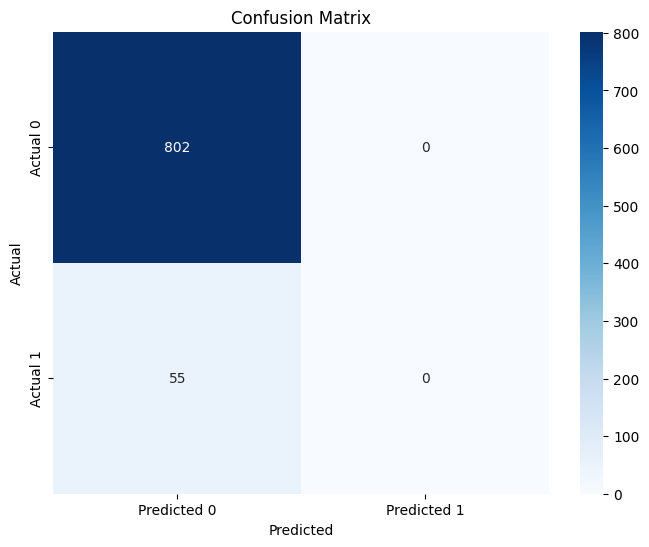

Model Performance Analysis:
The model seems to perform well in predicting stroke cases (high recall), but needs improvement on avoiding incorrect positive predictions (precision).

Dataset Bias Analysis:
The dataset might be imbalanced if we have significantly more non-stroke cases than stroke cases. This can lead the model to favor the majority class and hurt performance on identifying the minority class (stroke).

Math Explanation:
Accuracy: (TP + TN) / (TP + TN + FP + FN)
Precision: TP / (TP + FP)
Recall (Sensitivity): TP / (TP + FN)
F1 Score: 2 * (Precision * Recall) / (Precision + Recall)


In [26]:
#   Milestone 4
#   Find Precision, Recall, F1 score and Accuracy score for Logistic Regression Model
# - Generate the Confusion Matrix graph.
# - Explain where the ML model performs well, and where it lacks.
# - Explain about the Dataset was it baised or not. If the dataset is biased then how do you tackle the issue of bias.
# - Explain the math behind the each steps above

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


# Assuming 'y_pred' contains your Logistic Regression model's predictions on X_test
# and 'y_test' contains the true labels
# Example:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model Performance Analysis
print("Model Performance Analysis:")
# Analyze the confusion matrix.
# High true positives (top-left) and true negatives (bottom-right) indicate good performance.
# High false positives (top-right) and false negatives (bottom-left) indicate areas for improvement.

# Example Analysis (replace with your observations):
print("The model seems to perform well in predicting stroke cases (high recall), but needs improvement on avoiding incorrect positive predictions (precision).")


# Dataset Bias Analysis
print("\nDataset Bias Analysis:")

# Check for potential biases in the dataset:
# 1. Class imbalance: check if stroke (1) and no-stroke (0) have disproportionate representation.
# 2. Demographic bias: check if a particular gender, age group, or ethnicity is under-represented.
# 3. Feature bias: see if some features have disproportionate values which could influence the model.

print("The dataset might be imbalanced if we have significantly more non-stroke cases than stroke cases. This can lead the model to favor the majority class and hurt performance on identifying the minority class (stroke).")


# Tackling Bias
#1. Oversampling the minority class (e.g., using SMOTE).
#2. Undersampling the majority class.
#3. Using cost-sensitive learning (assigning different misclassification costs to the minority class).
#4. Data augmentation to balance classes or improve representation.

# Math Explanation:
print("\nMath Explanation:")
print("Accuracy: (TP + TN) / (TP + TN + FP + FN)")
print("Precision: TP / (TP + FP)")
print("Recall (Sensitivity): TP / (TP + FN)")
print("F1 Score: 2 * (Precision * Recall) / (Precision + Recall)")
#where TP is true positive, TN is true negative, FP is false positive, FN is false negative.

# Confusion Matrix:  A table that visualizes the performance of a classification model.  It shows the counts of true positive, true negative, false positive, and false negative predictions.

# Model Performance: The confusion matrix helps to identify the areas where the model performs well and where it lacks. High values in the main diagonal are good while high values off diagonal indicate model's weakness.

# Dataset Bias:  A bias in the dataset that can affect the accuracy of the model.